In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', 100)

In [2]:
accidents = pd.read_hdf('results/accidents.h5', 'accidents')
accidents16 = pd.read_hdf('results/accidents16.h5', 'accidents16')
person = pd.read_hdf('results/person.h5', 'person')
vehicles=pd.read_hdf('results/vehicles.h5', 'vehicles')
fatal_crashs = pd.merge(vehicles, accidents, left_index=True, right_index=True, how='inner',on=('STATE', 'YEAR','CASE_NUM'))
fatal_crashs_all = pd.merge(fatal_crashs, person, how='inner',on=('STATE', 'YEAR','CASE_NUM'))

In [3]:
fatal_crashs['DRINKING_INDICATOR'].value_counts()
# fatal_crashs.head()

0.0    378649
1.0    100504
Name: DRINKING_INDICATOR, dtype: int64

In [4]:
accidents.head()

,YEAR,CASE_NUM,STATE,NUM_VEHICLE,FATALS,MONTH,DAY_WEEK,HOUR,HIGHWAY,LATITUDE,LONGITUD,COLLISION_TYPE,LIGHT_CONDITION,WEATHER,CRASH_FACTOR,DRUNK_DRIVE
200710001,2007,10001,1,1.0,1.0,January,Tuesday,23.0,Off,33.455839,-87.017928,Not Collision,Dark,Clear,0.0,0.0
200710002,2007,10002,1,3.0,2.0,January,Tuesday,13.0,Off,34.160597,-85.678075,"Sideswipe, Same Direction",Daylight,Clear,0.0,0.0
200710003,2007,10003,1,2.0,1.0,January,Sunday,12.0,Off,33.975717,-86.496347,"Sideswipe, Unknown Direction",Daylight,Clear,0.0,0.0
200710004,2007,10004,1,2.0,1.0,January,Monday,15.0,On,33.853258,-85.915622,Angle,Daylight,Clear,0.0,0.0
200710005,2007,10005,1,2.0,1.0,January,Saturday,19.0,Off,32.488833,-86.408936,"Sideswipe, Same Direction",Dark,Clear,0.0,0.0


In [5]:
accidents['DRUNK_INDICATOR']=accidents['DRUNK_DRIVE'].where(accidents['DRUNK_DRIVE'] <= 1, 1)
Death_by_year=accidents.groupby('YEAR',as_index=False)['FATALS'].sum()
Death_by_year_Alcohol =accidents[accidents.DRUNK_DRIVE == 1].groupby('YEAR',as_index=False)['FATALS'].sum()
Death_by_year['Fatal_Involved_Alcohol']= Death_by_year_Alcohol['FATALS']
Death_by_year

,YEAR,FATALS,Fatal_Involved_Alcohol
0,2007,41259.0,12942.0
1,2008,37423.0,11900.0
2,2009,33883.0,10812.0
3,2010,32999.0,10233.0
4,2011,32479.0,9876.0
5,2012,33782.0,10206.0
6,2013,32893.0,9835.0
7,2014,32744.0,9443.0
8,2015,35485.0,9900.0
9,2016,37461.0,9412.0


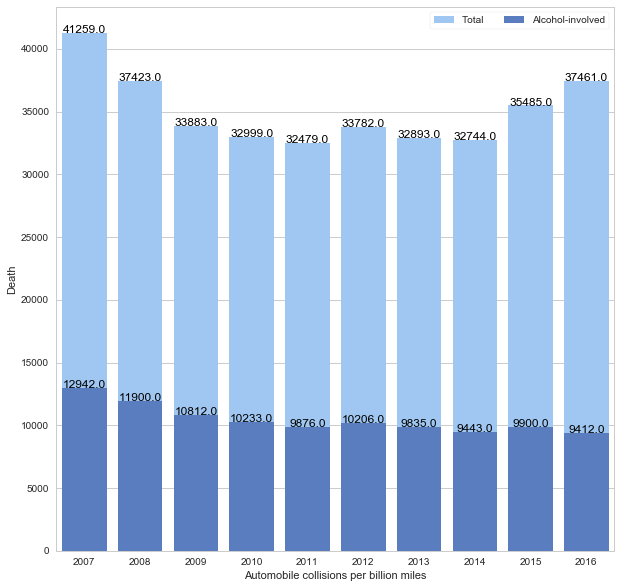

In [6]:
f, g = plt.subplots(figsize=(10, 10))
# Plot the total deadth
sns.set_color_codes("pastel")
g = sns.barplot(x="YEAR",y="FATALS",data=Death_by_year,label="Total", color="b")
# Plot the total deadth where alcohol was involved
sns.set_color_codes("muted")
g = sns.barplot(x="YEAR", y="Fatal_Involved_Alcohol", data=Death_by_year,
            label="Alcohol-involved", color="b")
# Add a legend and informative axis label
g.legend(ncol=2, frameon=True)
g.set( ylabel="Death",xlabel="Automobile collisions per billion miles")
for index, row in Death_by_year.iterrows():
    g.text(row.name,row.FATALS, round(row.FATALS,2),color='black', ha="center")
    g.text(row.name,row.Fatal_Involved_Alcohol, round(row.Fatal_Involved_Alcohol,2),color='black', ha="center")

plt.show()

In [7]:
accidents15 = pd.read_hdf('results/accidents15.h5', 'accidents15')
accidents15['DRUNK_INDICATOR']=accidents15['DRUNK_DR'].where(accidents15['DRUNK_DR'] <= 1, 1)
Death_by_state15=accidents15.groupby('STATE',as_index=False)['FATALS'].sum()
Death_by_state_alcohol15 =accidents15[accidents15.DRUNK_DR == 1].groupby('STATE',as_index=False)['FATALS'].sum()
Death_by_state15['Fatal_Involved_Alcohol']= Death_by_state_alcohol15['FATALS']
Death_by_state15['STATE_NAME']=Death_by_state15['STATE'].map({ 1: 'Alabama', 31: 'Nebraska',2: 'Alaska' ,32:'Nevada',4: 'Arizona' ,33 :'New Hampshire',5: 'Arkansas' ,34 :'New Jersey',6 :'California' ,35 :'New Mexico',8 :'Colorado' ,36 :'New York',9 :'Connecticut' ,37 :'North Carolina',10: 'Delaware' ,38 :'North Dakota',11: 'District of Columbia', 39 :'Ohio',12 :'Florida' ,40 :'Oklahoma',13 :'Georgia' ,41: 'Oregon',15 :'Hawaii' ,42: 'Pennsylvania',16 :'Idaho' ,43 :'Puerto Rico',17 :'Illinois' ,44 :'Rhode Island',18 :'Indiana ',45 :'South Carolina',19 :'Iowa' ,46 :'South Dakota',20 :'Kansas' ,47 :'Tennessee',21 :'Kentucky' ,48 :'Texas',22 :'Louisiana',49 :'Utah',23 :'Maine' ,50 :'Vermont',24:'Marland', 52: 'Virgin Islands (since 2004)',25 :'Massachusetts' ,51: 'Virginia',26 :'Michigan' ,53 :'Washington',27 :'Minnesota' ,54 :'West Virginia',28 :'Mississippi' ,55 :'Wisconsin',29 :'Missouri' ,56 :'Wyoming',30 :'Montana'})

Death_by_state15_sort =Death_by_state15.sort_values("FATALS", ascending=False)
Death_by_state15_sort.head()

,STATE,FATALS,Fatal_Involved_Alcohol,STATE_NAME
43,48,3582,918,Texas
4,6,3387,1027,California
9,12,2938,685,Florida
10,13,1432,312,Georgia
33,37,1379,431,North Carolina


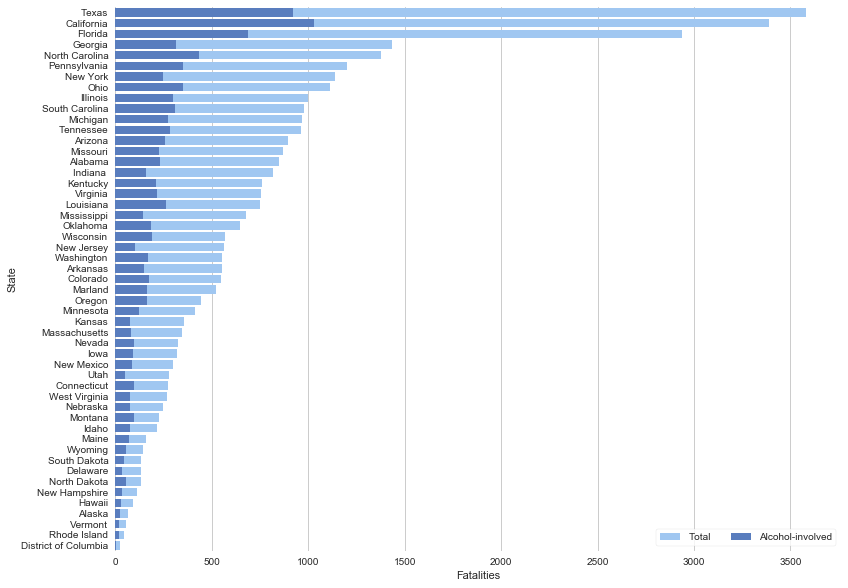

In [8]:
f, g = plt.subplots(figsize=(13, 10))
# Plot the total deadth
sns.set_color_codes("pastel")
g = sns.barplot(x="FATALS",y="STATE_NAME",data=Death_by_state15_sort,label="Total", color="b")
# Plot the total deadth where alcohol was involved
sns.set_color_codes("muted")
g = sns.barplot(x="Fatal_Involved_Alcohol", y="STATE_NAME", data=Death_by_state15_sort,
            label="Alcohol-involved", color="b")
# Add a legend and informative axis label
g.set( ylabel="State",xlabel="Fatalities")
g.legend(ncol=2, frameon=True)
sns.despine(left=True, bottom=True)
plt.show()

In [9]:
licensed_drivers_by_states = pd.read_csv('accident/licensed_drivers_by_states.csv')
licensed_drivers_by_states.head()
Prop_drivers_accident15 =Death_by_state15.merge(licensed_drivers_by_states.drop('STATE_NAME',1), on='STATE', how='left')
Prop_drivers_accident15['FATALS_ALOCOHOL_PROPORTION']=(Prop_drivers_accident15['Fatal_Involved_Alcohol']/Prop_drivers_accident15['TOTAL'])*100
Prop_drivers_accident15_sort =Prop_drivers_accident15.sort_values("FATALS_ALOCOHOL_PROPORTION", ascending=False)

Prop_drivers_accident15_sort.head()

,STATE,FATALS,Fatal_Involved_Alcohol,STATE_NAME,TOTAL,FATALS_ALOCOHOL_PROPORTION
50,56,145,56,Wyoming,422450,0.013256
26,30,224,95,Montana,781427,0.012157
34,38,131,56,North Dakota,545027,0.010275
40,45,979,309,South Carolina,3683824,0.008388
18,22,752,263,Louisiana,3357091,0.007834


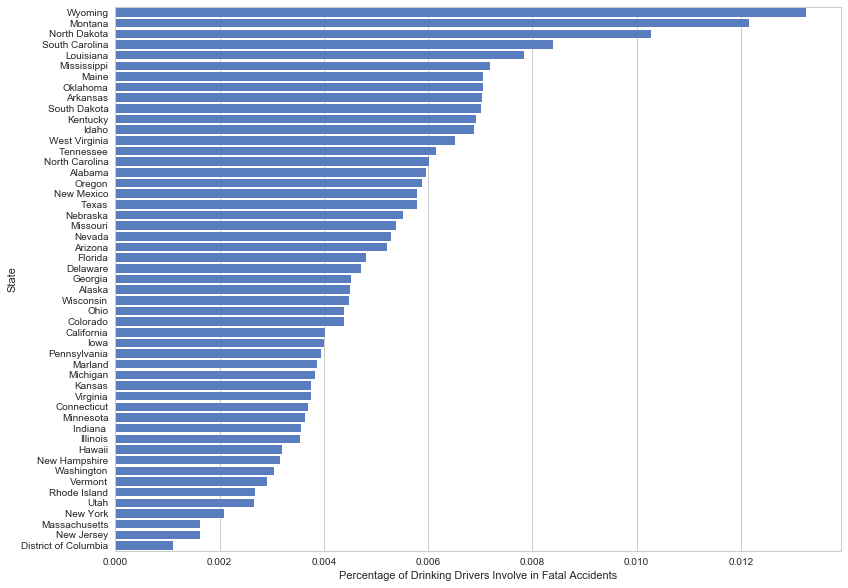

In [10]:
f, g = plt.subplots(figsize=(13, 10))
# Plot the total deadth where alcohol was involved
sns.set_color_codes("muted")
g = sns.barplot(x="FATALS_ALOCOHOL_PROPORTION", y="STATE_NAME", data=Prop_drivers_accident15_sort,label="Alcohol-involved", color="b")
# Add a legend and informative axis label
g.set( ylabel="State",xlabel="Percentage of Drinking Drivers Involve in Fatal Accidents")
plt.show()

In [11]:
Death_by_age_drinking=fatal_crashs_all.loc[fatal_crashs_all['DRINKING_INDICATOR'] == 1].loc[fatal_crashs_all['AGE']<=98].loc[fatal_crashs_all['AGE']>=16].groupby('AGE',as_index=False)['FATALS'].sum()
Death_by_age_drinking.rename(columns={'FATALS':'Fatal_Involved_Alcohol'},inplace=True)

Death_by_age_nondrinking=fatal_crashs_all.loc[fatal_crashs_all['DRINKING_INDICATOR'] == 0].loc[fatal_crashs_all['AGE']<=98].loc[fatal_crashs_all['AGE']>=16].groupby('AGE',as_index=False)['FATALS'].sum()
Death_by_age_drinking['Fatal_No_Alcohol']= Death_by_age_nondrinking['FATALS']
Death_by_age_drinking.head()

,AGE,Fatal_Involved_Alcohol,Fatal_No_Alcohol
0,16.0,3589.0,25749.0
1,17.0,5287.0,33010.0
2,18.0,8194.0,41790.0
3,19.0,9093.0,37919.0
4,20.0,9752.0,40241.0


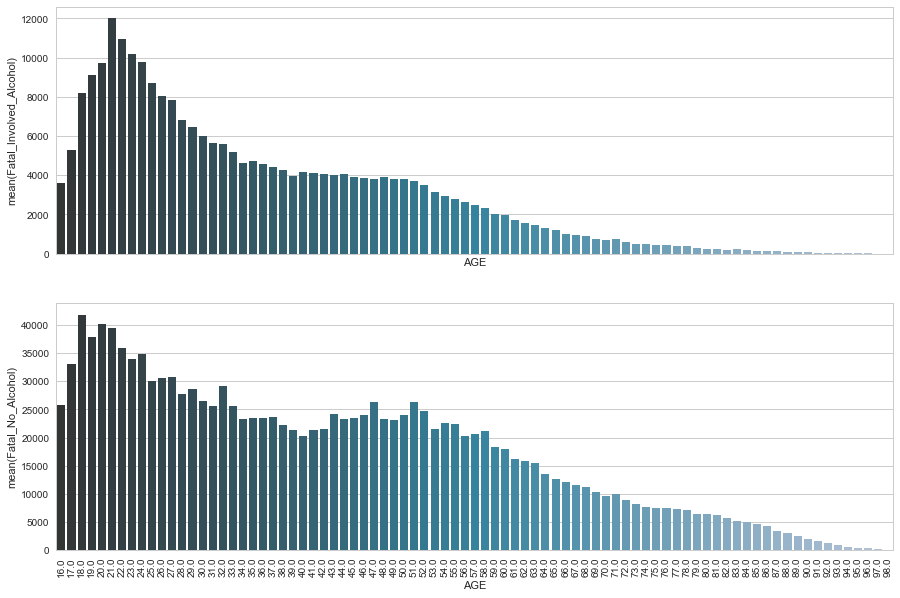

In [12]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(15, 10))
g = sns.barplot(x="AGE", y="Fatal_Involved_Alcohol", data=Death_by_age_drinking,label="Total",palette="PuBuGn_d",ax=ax1)
g = sns.barplot(x="AGE", y="Fatal_No_Alcohol", data=Death_by_age_drinking,label="Total",palette="PuBuGn_d",ax=ax2)
plt.xticks(rotation='vertical')
plt.show()

In [13]:
# since data before 2009 do not contain information of whether the driver speeding or not, so we select data from after 2009
fatal_crashs_since2009=fatal_crashs_all.loc[fatal_crashs_all['YEAR'] >= 2009]
no_trains=fatal_crashs_since2009[(fatal_crashs_since2009.SPEED <= 200)& (fatal_crashs_since2009.SEX <= 2)]
no_trains.head()

,STATE,YEAR,CASE_NUM,SPEED,ROLLOVER,FIRE,BODY_TYP,SPEEDING,DEATHS,DRINKING_INDICATOR,NUM_VEHICLE,FATALS,MONTH,DAY_WEEK,HOUR,HIGHWAY,LATITUDE,LONGITUD,COLLISION_TYPE,LIGHT_CONDITION,WEATHER,CRASH_FACTOR,DRUNK_DRIVE,AGE,SEX,RACE
354130,10,2009,100001,50.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0,1.0,January,Saturday,1.0,Off,39.6102,-75.7064,Not Collision,Dark,Clear,0.0,0.0,33.0,1.0,1.0
354131,10,2009,100001,50.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0,1.0,January,Saturday,1.0,Off,39.6102,-75.7064,Not Collision,Dark,Clear,0.0,0.0,29.0,2.0,0.0
354132,10,2009,100002,50.0,0.0,0.0,15.0,0.0,2.0,0.0,2.0,2.0,January,Saturday,16.0,Off,39.6752,-75.7040,"Sideswipe, Same Direction",Daylight,Clear,0.0,0.0,71.0,2.0,1.0
354133,10,2009,100002,50.0,0.0,0.0,15.0,0.0,2.0,0.0,2.0,2.0,January,Saturday,16.0,Off,39.6752,-75.7040,"Sideswipe, Same Direction",Daylight,Clear,0.0,0.0,70.0,1.0,1.0
354134,10,2009,100002,50.0,0.0,0.0,15.0,0.0,2.0,0.0,2.0,2.0,January,Saturday,16.0,Off,39.6752,-75.7040,"Sideswipe, Same Direction",Daylight,Clear,0.0,0.0,41.0,1.0,0.0


In [14]:
no_trains['SEX'].value_counts()

1.0    302824
2.0    169628
Name: SEX, dtype: int64

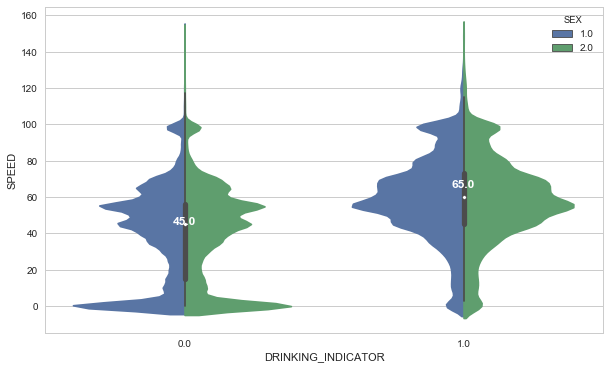

In [15]:
Drunk_Speeding=sns.violinplot(data=no_trains, x="DRINKING_INDICATOR", y="SPEED",
               hue="SEX", split=True)
medians = no_trains.groupby(['SPEEDING'])['SPEED'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,Drunk_Speeding.get_xticklabels()):
   Drunk_Speeding.text(pos[tick], medians[tick] + 0.05, median_labels[tick], horizontalalignment='center', color='w', weight='semibold')

In [16]:
np.std(no_trains.loc[no_trains['SPEEDING'] == 0]['SPEED'])

25.80517362776295

In [43]:
def two_sample_test(data):
    """Test H_0:mu = 0"""
    x1=data.loc[no_trains['SPEEDING'] == 0]['SPEED'].mean()
    x2=data.loc[no_trains['SPEEDING'] == 1]['SPEED'].mean()
    var1 = np.std(data.loc[no_trains['SPEEDING'] == 0]['SPEED'])
    var2 = np.std(data.loc[no_trains['SPEEDING'] == 1]['SPEED'])
    n1 = len(data.loc[no_trains['SPEEDING'] == 0]['SPEED'])
    n2 = len(data.loc[no_trains['SPEEDING'] == 1]['SPEED'])
    test_stat = (x2-x1)/(var1/n1 + var2/n2)**
    if test_stat > 1.96:
        return True
    else:
        return False

In [44]:
two_sample_test(no_trains)

AttributeError: 'float' object has no attribute 'sqrt'

In [34]:
x1=no_trains.loc[no_trains['SPEEDING'] == 0]['SPEED'].mean()


In [35]:
x2=no_trains.loc[no_trains['SPEEDING'] == 1]['SPEED'].mean()



In [36]:
var1=np.std(no_trains.loc[no_trains['SPEEDING'] == 0]['SPEED'])

In [37]:
var2=np.std(no_trains.loc[no_trains['SPEEDING'] == 1]['SPEED'])

In [51]:
import math
n1 = len(no_trains.loc[no_trains['SPEEDING'] == 0]['SPEED'])
n2 = len(no_trains.loc[no_trains['SPEEDING'] == 1]['SPEED'])
(x2-x1)/(var1/n1 + var2/n2)**(0.5)

1199.463841645172

In [33]:
n2

40898